In [17]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [18]:
symd = pd.read_csv('symtoms_df.csv')

In [19]:
symd

,Unnamed: 0,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4
0,0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches
1,1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN
2,2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN
3,3,Fungal infection,itching,skin_rash,dischromic _patches,NaN
4,4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN
...,...,...,...,...,...,...
4915,4915,(vertigo) Paroymsal Positional Vertigo,vomiting,headache,nausea,spinning_movements
4916,4916,Acne,skin_rash,pus_filled_pimples,blackheads,scurring
4917,4917,Urinary tract infection,burning_micturition,bladder_discomfort,foul_smell_of urine,continuous_feel_of_urine
4918,4918,Psoriasis,skin_rash,joint_pain,skin_peeling,silver_like_dusting


In [20]:
symd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4920 entries, 0 to 4919
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4920 non-null   int64 
 1   Disease     4920 non-null   object
 2   Symptom_1   4920 non-null   object
 3   Symptom_2   4920 non-null   object
 4   Symptom_3   4920 non-null   object
 5   Symptom_4   4572 non-null   object
dtypes: int64(1), object(5)
memory usage: 230.8+ KB


In [21]:
#checking for null values
symd.isna().sum()

,0
Unnamed: 0,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,348


In [22]:
#checking for duplicates
symd.nunique()

,0
Unnamed: 0,4920
Disease,41
Symptom_1,34
Symptom_2,48
Symptom_3,54
Symptom_4,50


In [23]:
#removing unnecessary columns[s.no]
symd = symd.drop(symd.iloc[:,0:1], axis = 1)

In [24]:
symd['Disease'].value_counts()

,count
Disease,
Fungal infection,120
Hepatitis C,120
Hepatitis E,120
Alcoholic hepatitis,120
Tuberculosis,120
Common Cold,120
Pneumonia,120
Dimorphic hemmorhoids(piles),120
Heart attack,120


In [25]:
s = set()
p = set()
q = set()
symptoms = set()
for i in symd['Disease']:
  k = symd[symd['Disease'] == i].iloc[:,1:5].stack().unique()
  for i in k:
    symptoms.add(i)
  x = len(k)
  if x < 4:
    s.add(i)
  elif x == 4:
    p.add(i)
  else:
    q.add(i)
print(symptoms)

{' spotting_ urination', ' knee_pain', ' bruising', ' painful_walking', ' pus_filled_pimples', ' chills', ' acidity', ' irregular_sugar_level', ' skin_peeling', ' yellow_crust_ooze', ' bladder_discomfort', ' back_pain', ' mood_swings', ' restlessness', ' cramps', ' cough', ' continuous_feel_of_urine', ' altered_sensorium', ' burning_micturition', ' pain_in_anal_region', ' swelling_joints', ' yellowing_of_eyes', ' irritation_in_anus', ' ulcers_on_tongue', ' diarrhoea', ' lethargy', ' bloody_stool', ' sunken_eyes', ' sweating', ' anxiety', ' stiff_neck', ' blurred_and_distorted_vision', ' dischromic _patches', ' blister', ' silver_like_dusting', ' continuous_sneezing', ' patches_in_throat', ' breathlessness', ' weakness_of_one_body_side', ' cold_hands_and_feets', ' yellowish_skin', ' weight_loss', ' obesity', ' nausea', ' swelling_of_stomach', ' weakness_in_limbs', ' weight_gain', ' red_sore_around_nose', 'itching', ' pain_during_bowel_movements', ' scurring', ' nodal_skin_eruptions', ' 

In [26]:
print(s)
print(p)
print(q)

set()
{' diarrhoea', ' scurring', ' watering_from_eyes', ' altered_sensorium', ' extra_marital_contacts', ' dischromic _patches', ' continuous_feel_of_urine', ' chest_pain'}
{' spotting_ urination', ' painful_walking', ' lethargy', ' family_history', ' distention_of_abdomen', ' small_dents_in_nails', ' irregular_sugar_level', ' sweating', ' high_fever', ' fatigue', ' yellow_crust_ooze', ' lack_of_concentration', ' headache', ' loss_of_appetite', ' excessive_hunger', ' loss_of_balance', ' breathlessness', ' indigestion', ' cough', ' swollen_legs', ' yellowish_skin', ' nausea', ' dark_urine', ' swelling_joints', ' yellowing_of_eyes', ' irritation_in_anus'}


In [27]:
symd['Symptom_4'] = symd['Symptom_4'].fillna('None')

In [28]:
symd.isna().sum()

,0
Disease,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


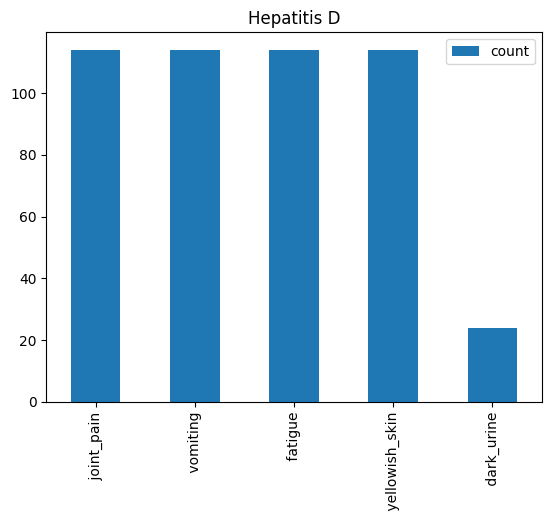

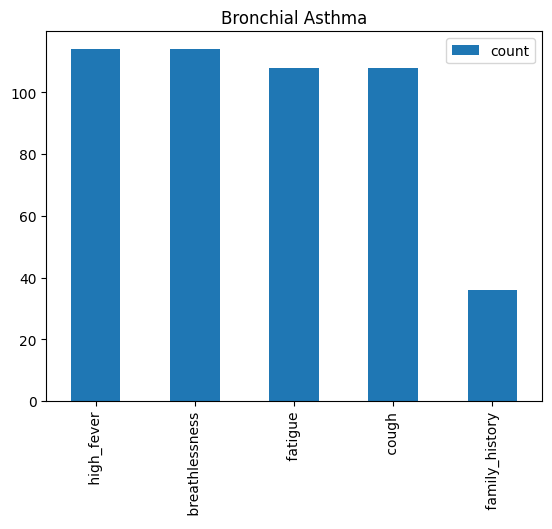

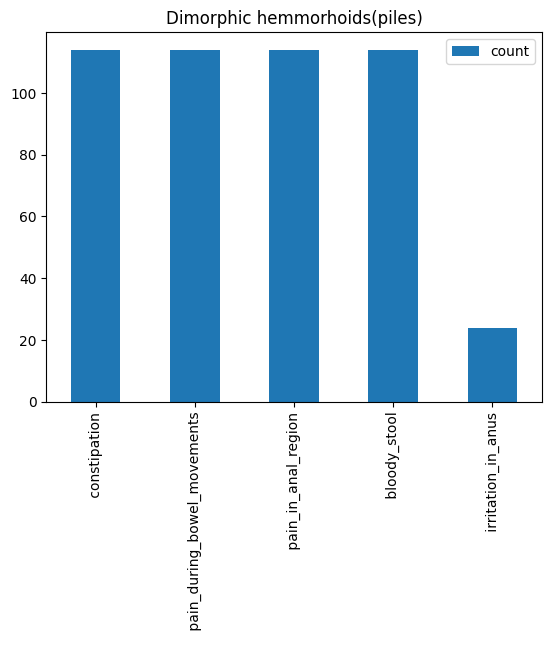

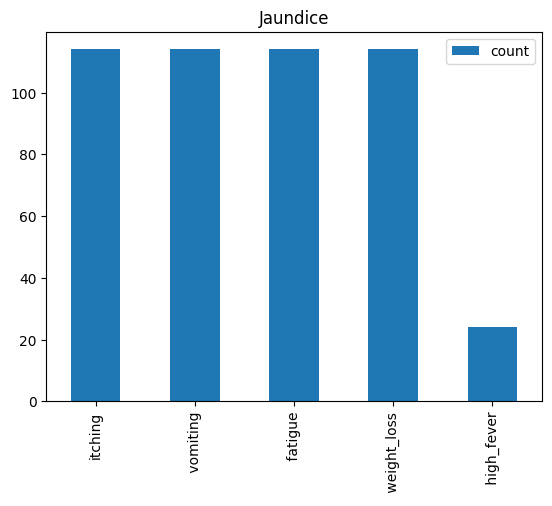

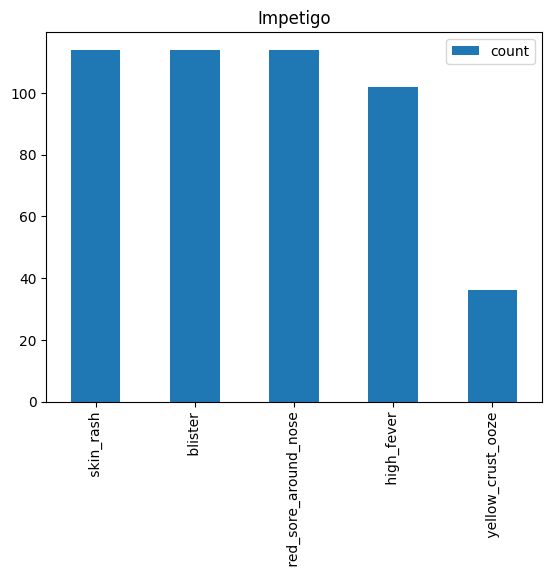

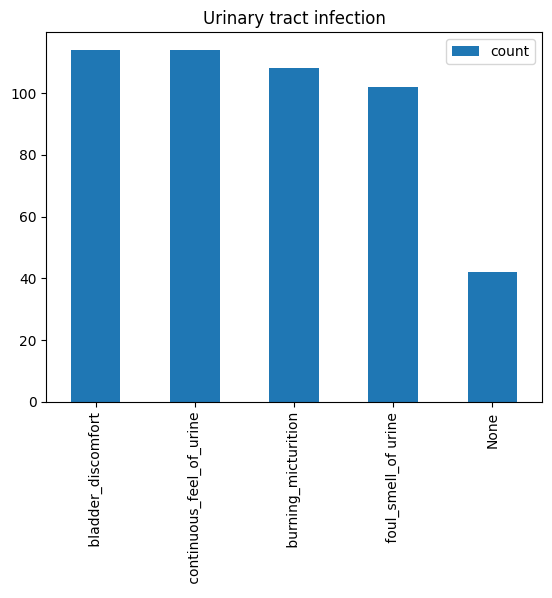

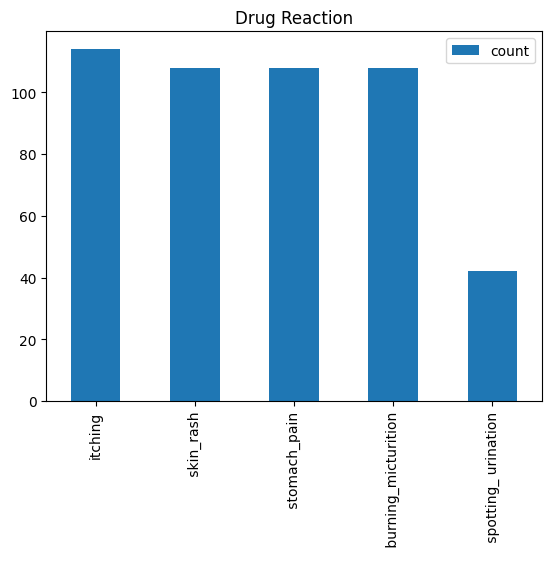

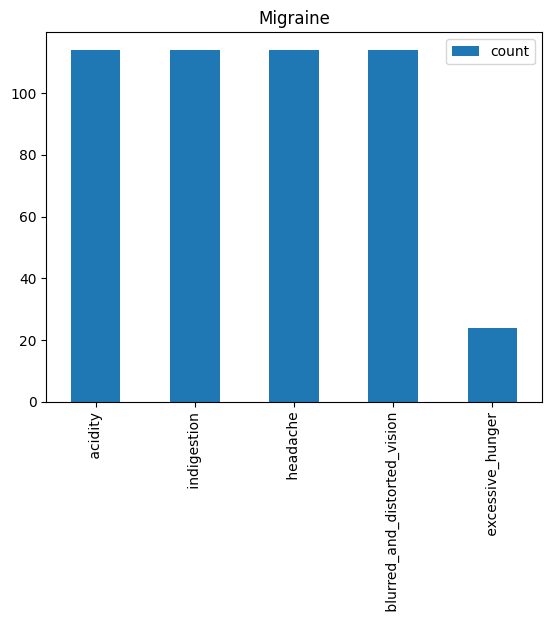

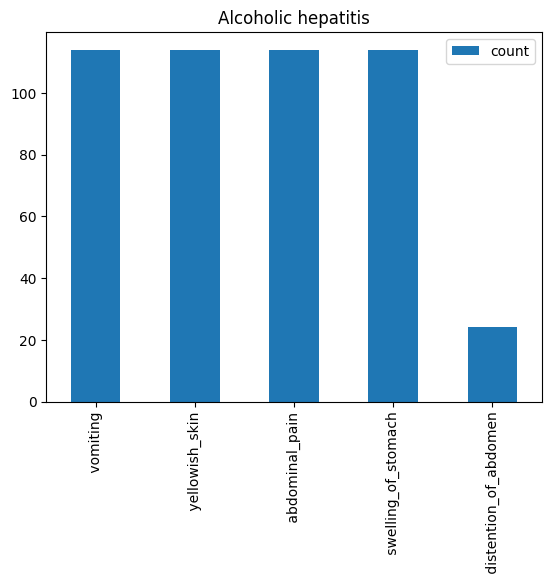

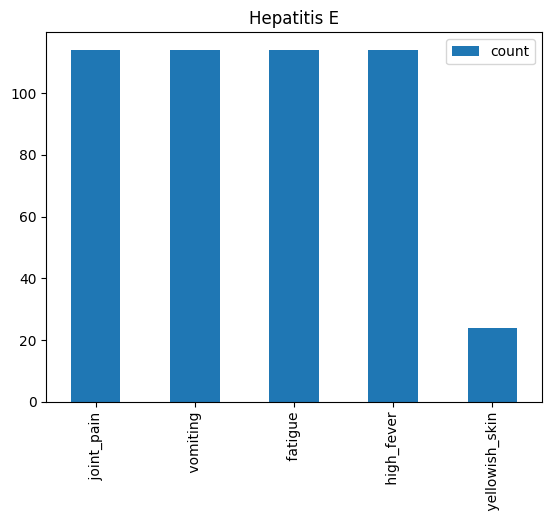

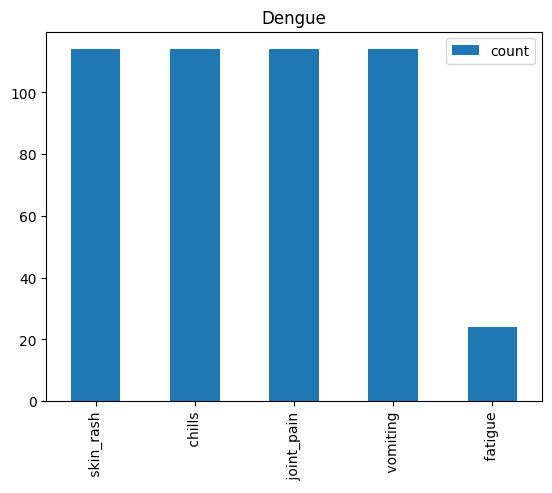

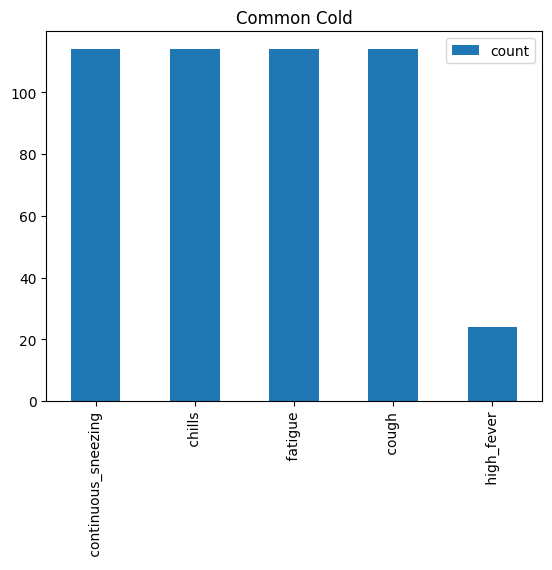

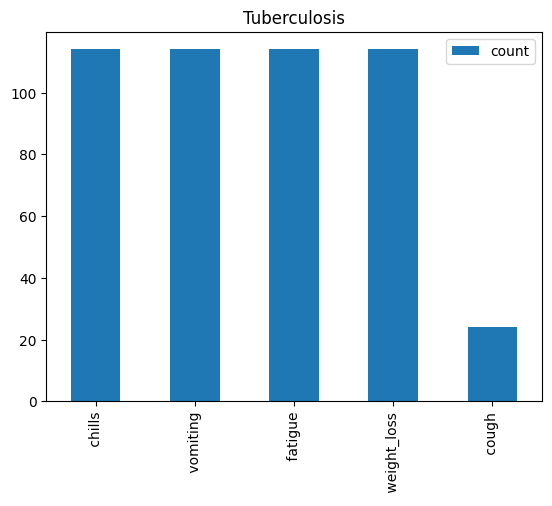

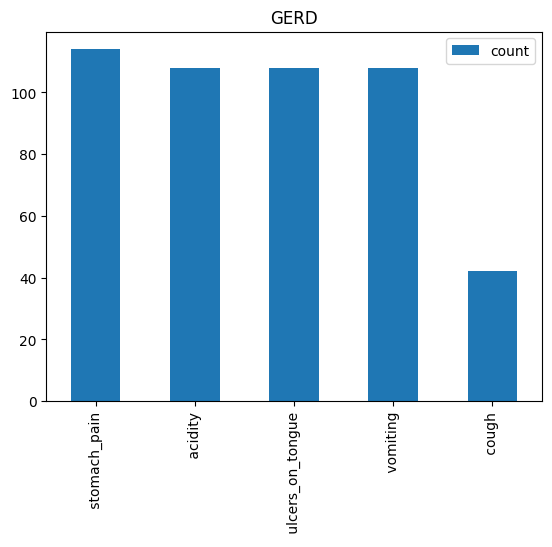

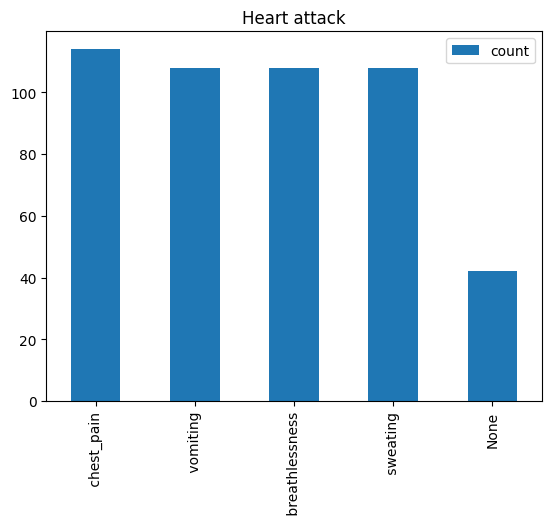

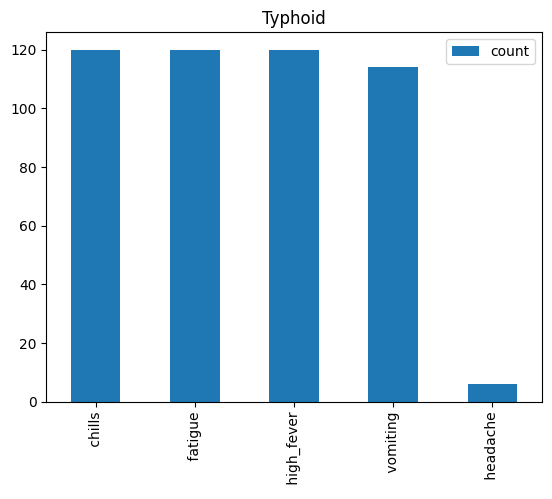

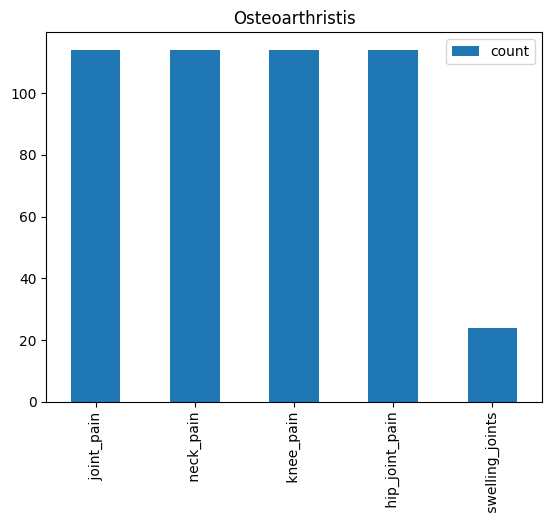

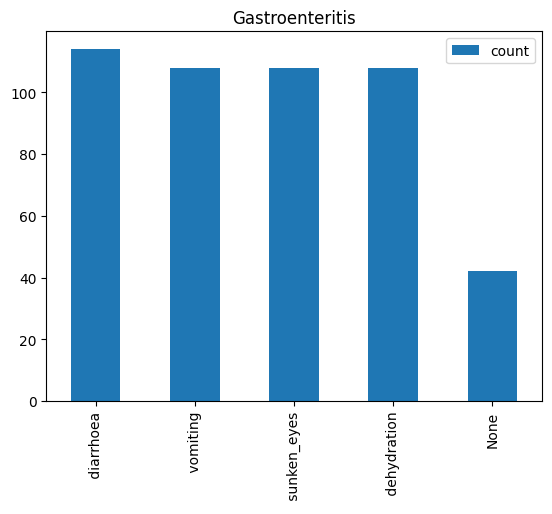

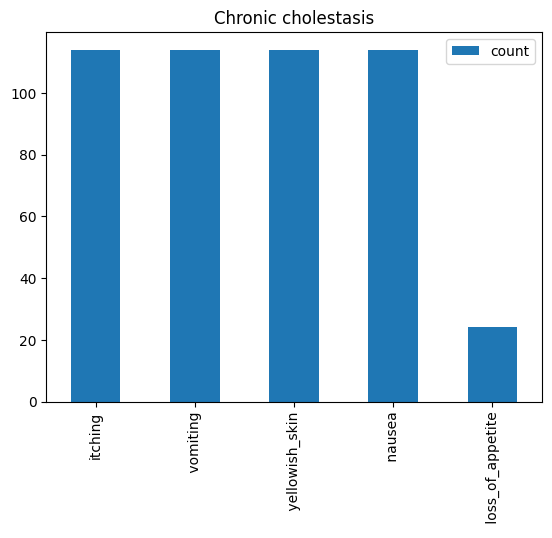

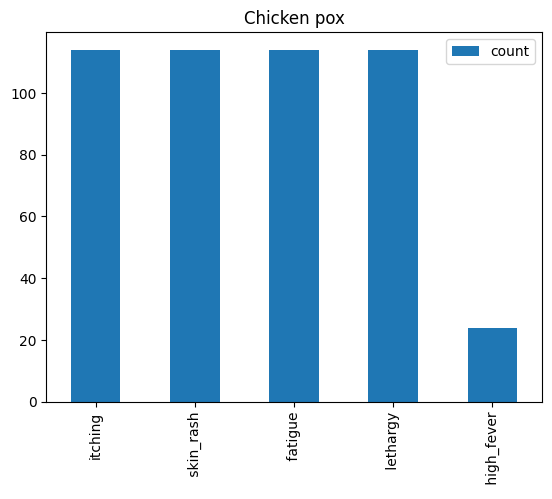

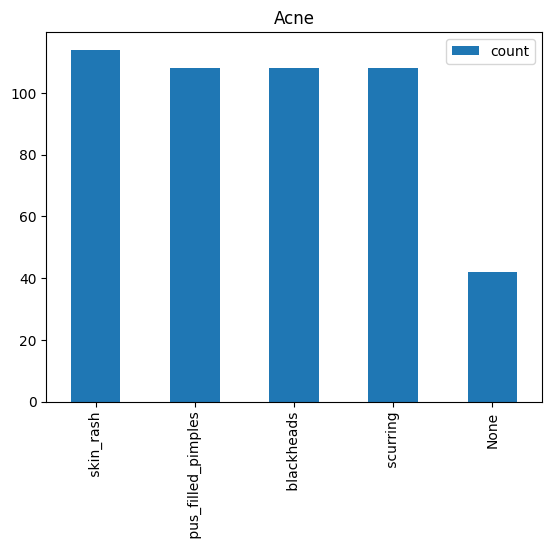

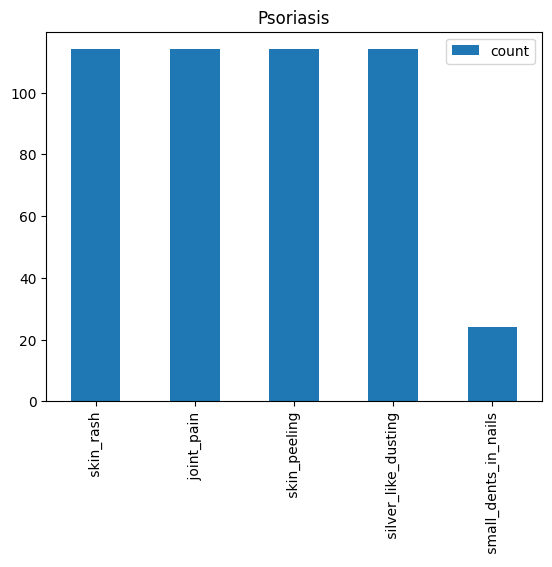

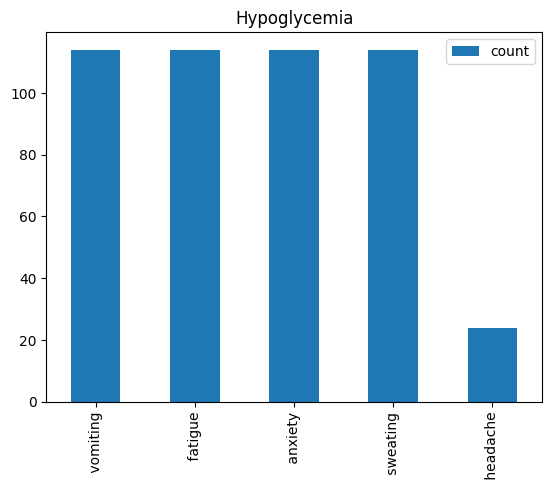

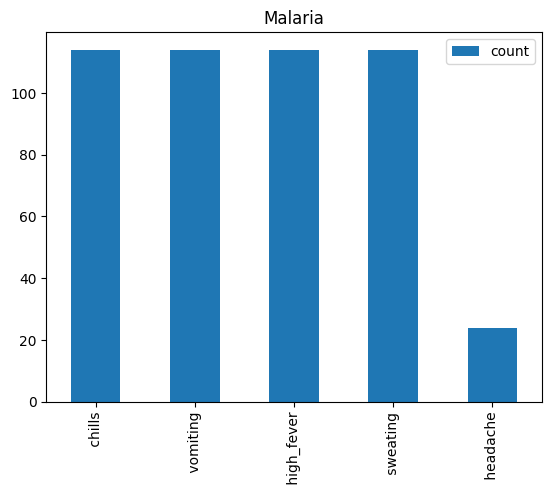

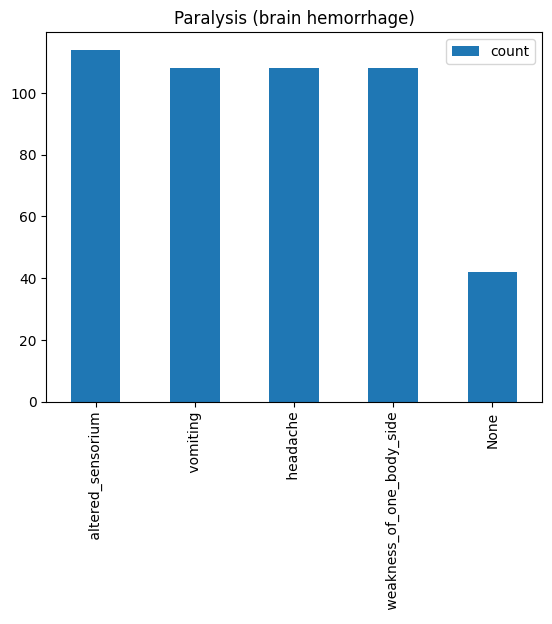

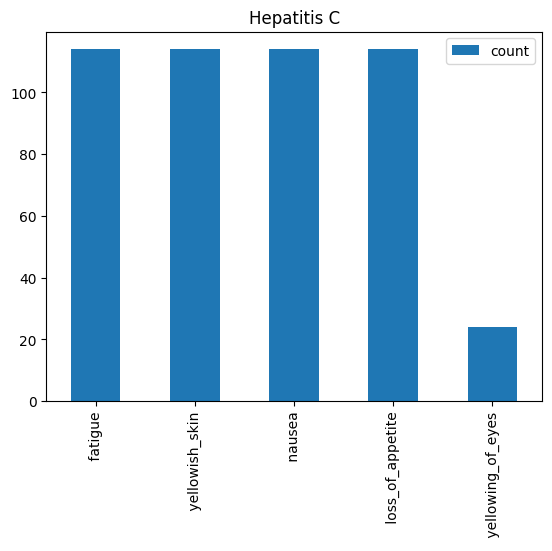

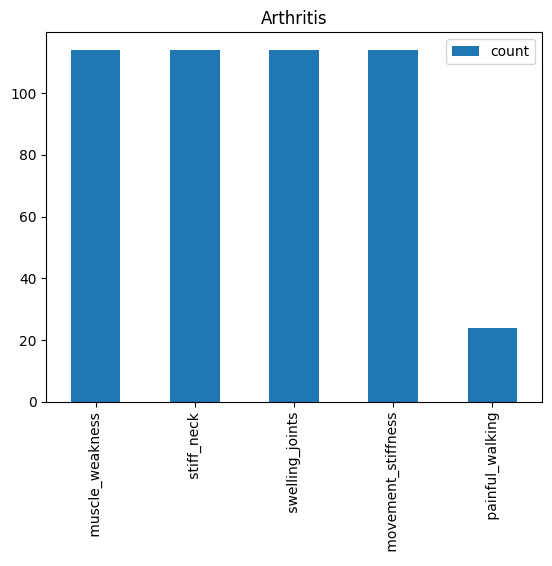

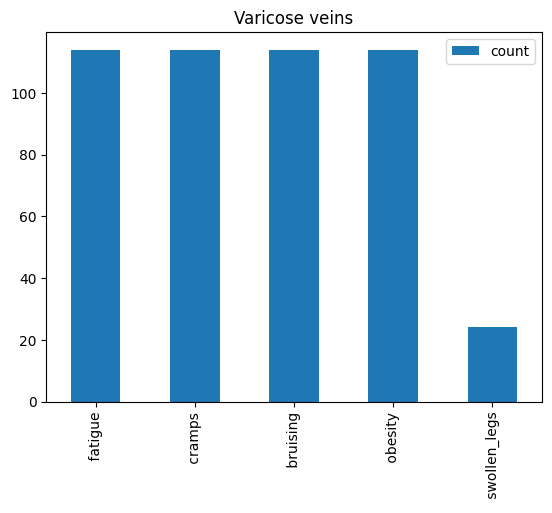

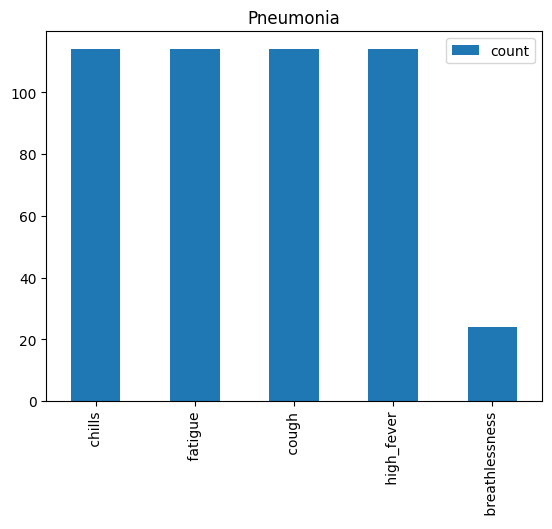

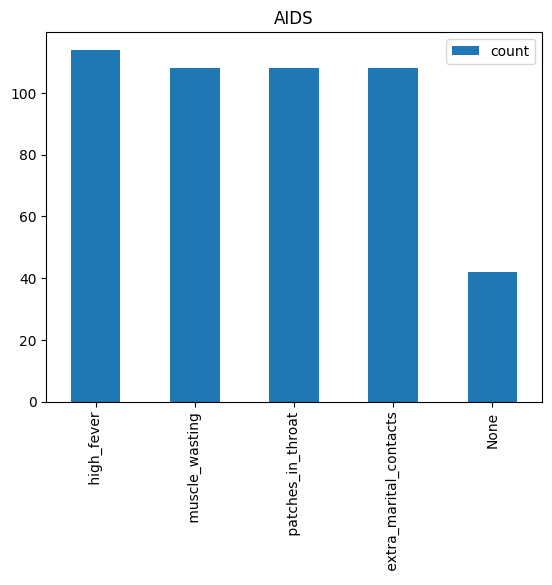

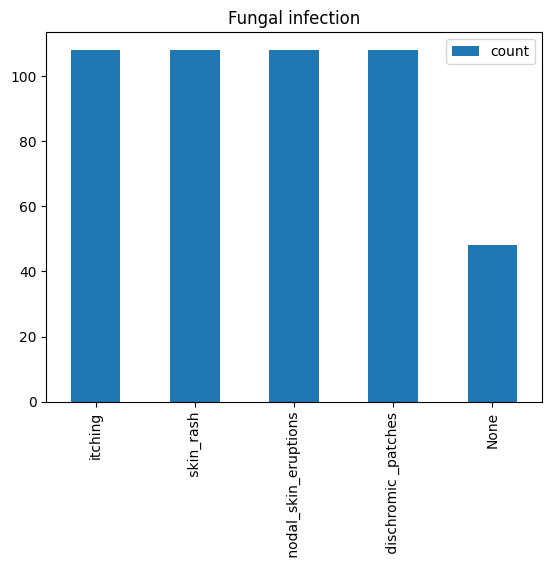

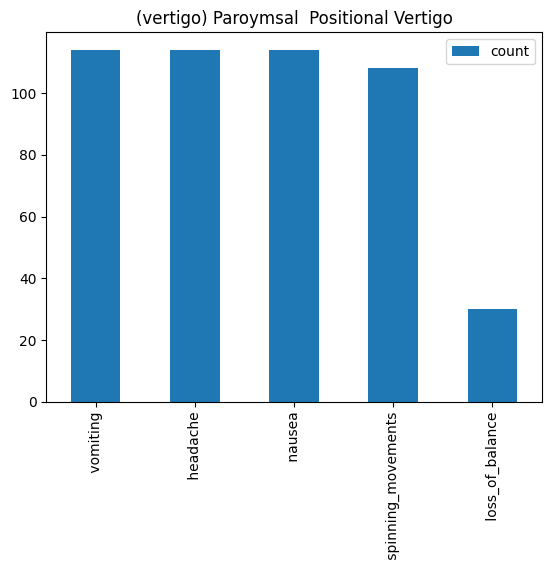

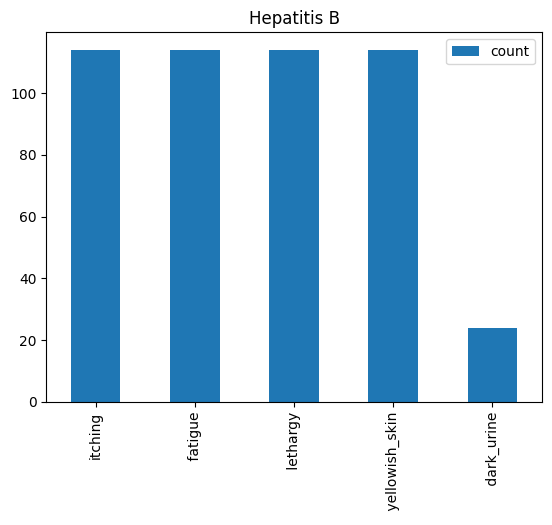

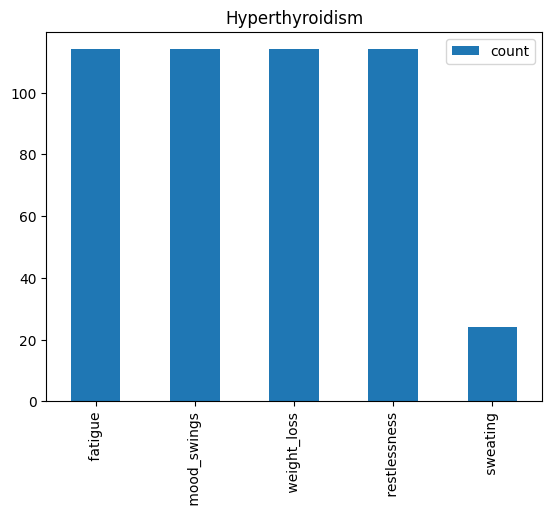

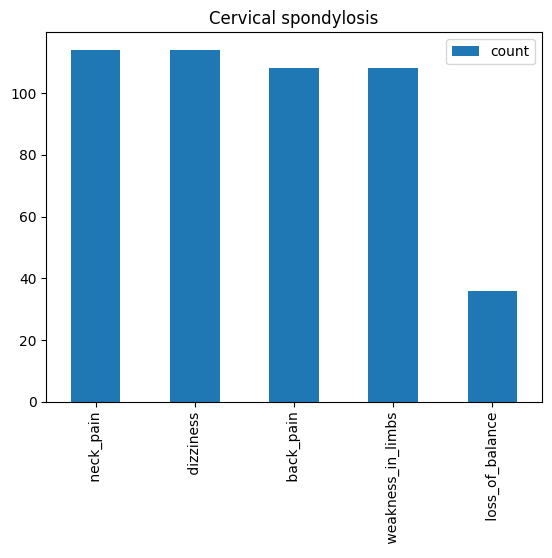

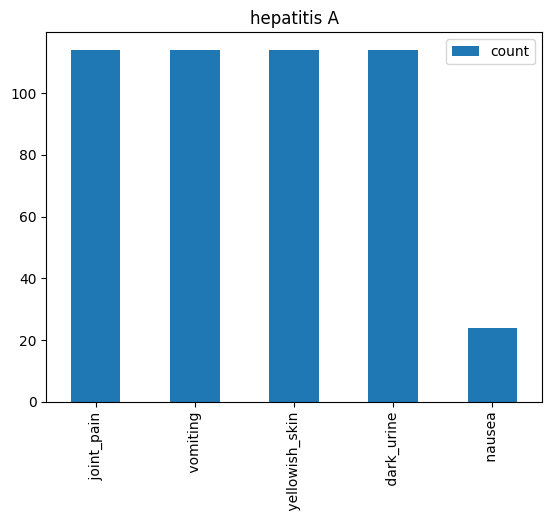

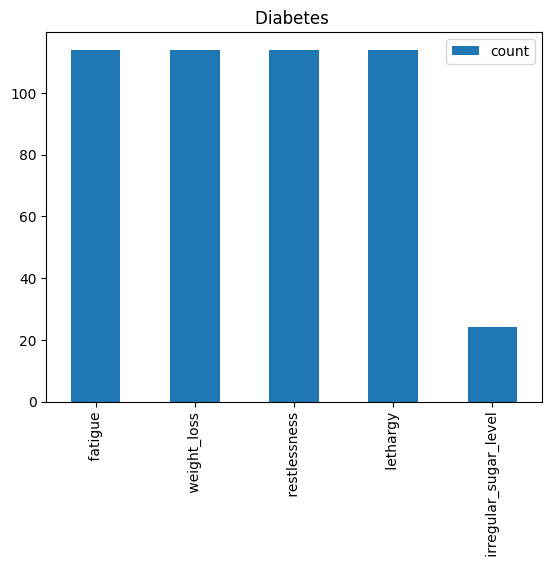

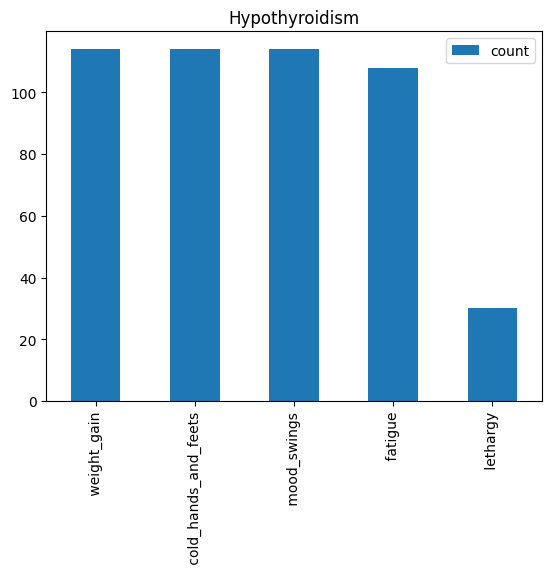

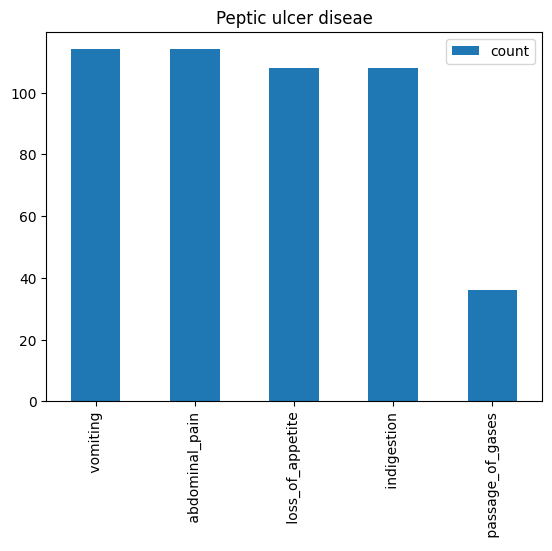

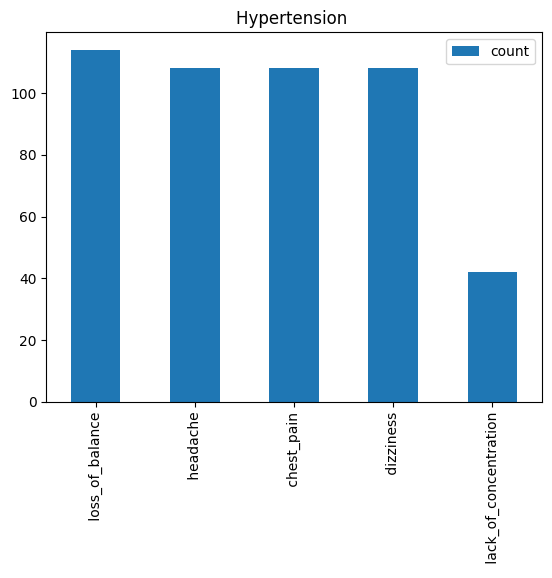

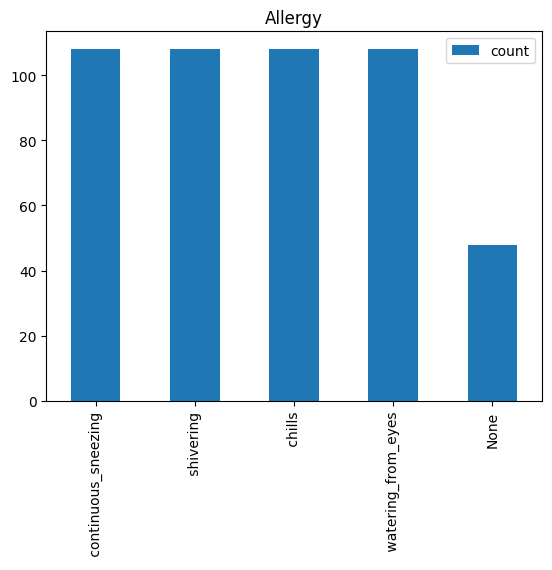

In [38]:
for i in list(set(symd['Disease'])):
  x = symd[symd['Disease'] == i].iloc[:,1:5].stack().value_counts()
  x = x.to_frame()
  x.plot(kind='bar', title=i)

In [40]:
symd.to_csv(r'C:\Users\barad\OneDrive\Desktop\sympmod.csv')